<a href="https://colab.research.google.com/github/gabrielmelo00/Machine-Learning-Projects/blob/main/Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
fn1 = "gabriel"
ln1 = "silva_vieira_de_melo"
filename = "_".join(map(lambda s: s.strip().lower(),
                    ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"
print(filename)

sd-tsia204_lab2_silva_vieira_de_melo_gabriel.ipynb


#**SD - TSIA 204**
##**Second Practical Work** 

Name: Gabriel Silva Vieira de Melo

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import scale

In [ ]:
sns.reset_defaults()
sns.set(style='dark', palette='colorblind')

#Exercice 1

In [ ]:
#Importing data from data_dm3.csv
df = pd.read_csv('data_dm3.csv',header= None)

#Renaming the data
n, m   = df.shape
df.columns = [str(i) for i in range(1,m + 1)]
df = df.rename(columns = {str(m):'Y'})

#Showing data
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,Y
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,-0.143979,-0.040059,0.842802,-0.379206,0.916746,-2.355941,-0.999524,-0.110796,1.712279,2.884387,-0.645134,3.745493,0.656654,-0.370989,0.993688,-1.383539,-1.018153,0.387654,-0.014052,-0.360692,-0.531013,0.341585,0.783628,-1.248698,-0.054499,-0.337745,-1.869383,0.656658,0.014553,-0.858207,...,1.110790,-0.254486,0.662526,-0.912451,-0.477240,-1.532187,-0.461441,-2.525748,0.568322,0.520620,-0.516160,-0.467396,1.365251,0.280318,1.438662,-1.471489,-1.292056,1.184959,0.089917,0.521071,-1.173316,0.512151,-0.374910,0.451388,-0.295596,-0.696280,1.517710,-1.244537,-0.229723,0.937546,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,1.248562,-0.527688,1.260376,0.673029,-0.507056,1.441486,0.684543,-1.427168,-0.827024,1.387451,-0.624598,-0.216404,-0.022431,-1.938479,-1.143878,-0.941538,0.587944,0.409334,-0.226553,-0.274476,-0.301681,-0.548755,0.660260,-0.292527,-0.830301,-0.024815,0.093171,0.184854,0.659346,0.023453,...,-0.413022,-0.905504,-0.775072,1.564414,-0.838463,0.342608,-0.874917,0.728367,-1.104763,-0.004731,0.665348,-2.213558,1.735811,0.063891,-0.349194,-1.191502,-0.103416,1.155222,-0.933356,0.237656,0.547982,-0.884854,-1.281770,0.677351,0.734293,-0.688901,-0.045326,1.858089,0.468615,0.940726,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,2.269739,0.521300,0.221907,0.041486,-0.360214,-0.675852,-2.107100,-0.344865,1.284206,1.483036,0.454233,1.467267,-0.216011,-0.545154,0.451173,1.071382,0.654145,-1.256757,0.659401,-2.981795,-0.399291,-0.200168,-1.284389,-0.694969,-0.054499,-0.744916,-0.153516,-0.009057,-1.076121,-0.576408,...,1.158315,-0.195460,-0.222329,-0.680245,0.449108,1.137670,1.092085,-1.793062,-1.493069,0.914259,-2.230965,1.612821,0.536945,2.220749,-0.257719,-0.213694,-0.203711,2.126828,-0.118523,-1.822842,2.315821,-0.926919,-0.946186,-0.212913,2.137168,2.038290,-0.700610,1.930568,0.674011,0.338998,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,2.316057,1.729722,-0.410363,1.030486,0.749292,-0.641629,-0.374515,0.879445,0.651940,0.740688,1.562574,0.320537,1.944994,-0.196823,0.459805,2.439480,-0.425467,-0.180575,0.757501,-0.393359,0.742157,1.148394,-0.295954,0.589195,0.721302,-0.384002,-0.098398,0.280842,1.040315,1.107964,...,-1.682714,0.413769,1.939559,-0.757647,0.540113,-0.970314,-0.088178,0.666974,0.396550,-1.206687,-0.180724,1.550825,0.416229,-1.037434,0.187025,-0.756704,0.506757,-1.756789,-0.914933,0.939691,0.289688,-1.040168,-0.085549,0.501772,1.531429,-0.393853,0.019174,-0.441214,-0.907674,0.733290,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,-0.581929,0.140765,2.355125,0.858106,-0.042145,-2.664192,0.497189,-0.893489,-0.017889,1.873641,-2.213195,0.919168,-0.528519,-0.980568,-0.493626,-0.321895,2.267136,0.389260,0.591138,-0.814959,0.762401,0.550898,-0.902846,-0.364612,-0.054499,-0.207449,0.079756,1.541593,0.304692,-0.724918,...,0.440052,-0.224748,1.442341,0.171178,-2.440689,-0.367109,1.696386,-1.084878,-0.916147,-0.808334,-1.280435,0.106587,0.207964,0.146344,-0.877800,0.254671,-0.448050,0.555055,-0.363932,-0.206795,-0.925217,-0.681352,2.303520,2.242593,-1.258877,1.435178,0.807625,-0.391935,-0.333781,-0.714867,0.786157,

In [ ]:
#Separating the data frame in two matrices, X and Y , containing the input and output data respectively
Y = df.Y
df = df.drop('Y', axis=1)
X = df.values

n, m  = X.shape
print('Dimension of X: '+  str(n) + ',' +  str(m))
print('Dimension of Y: ' + str(n))

Dimension of X: 442,210
Dimension of Y: 442


In [ ]:
#Printing the mean of every covariate
mean = X.mean(axis = 0)
print(mean)

[ 1.00472672e-17 -8.03781375e-18  1.60756275e-17  0.00000000e+00
 -4.01890688e-18 -8.03781375e-18  2.61228947e-17  4.01890688e-18
  0.00000000e+00 -1.20567206e-17  2.41134413e-17  1.60756275e-17
 -3.41607085e-17  0.00000000e+00 -2.00945344e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.21512550e-17 -2.00945344e-17
 -3.61701619e-17  2.41134413e-17  1.60756275e-17 -1.60756275e-17
  1.80850809e-17 -2.00945344e-17 -3.21512550e-17 -5.42552428e-17
 -1.70803542e-17  4.01890688e-18  0.00000000e+00  1.60756275e-17
  2.00945344e-18  2.00945344e-17 -5.62646963e-17 -1.60756275e-17
 -6.02836031e-18 -2.61228947e-17  1.20567206e-17  3.21512550e-17
 -1.00472672e-17 -8.03781375e-18  5.02363360e-18  4.01890688e-18
  1.20567206e-17 -1.20567206e-17  8.03781375e-18  1.60756275e-17
 -1.80850809e-17  4.01890688e-18 -8.03781375e-18  2.61228947e-17
  5.02363360e-18  1.80850809e-17 -8.03781375e-18  8.03781375e-18
  1.00472672e-17  0.00000000e+00 -4.01890688e-17 -1.20567206e-17
 -8.03781375e-18 -2.41134

In [ ]:
#Printing the standard deviation of every covariate
std = X.std(axis = 0)
print(std)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


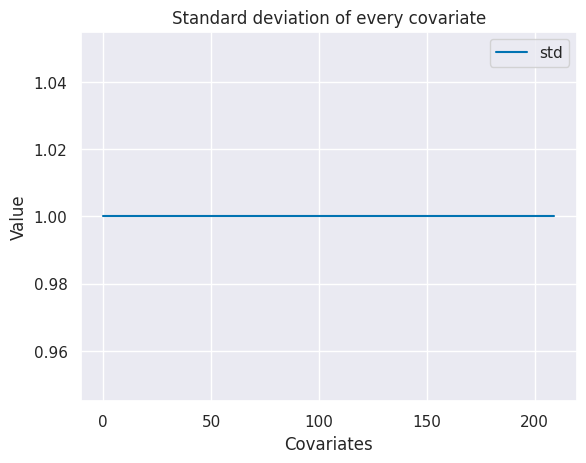

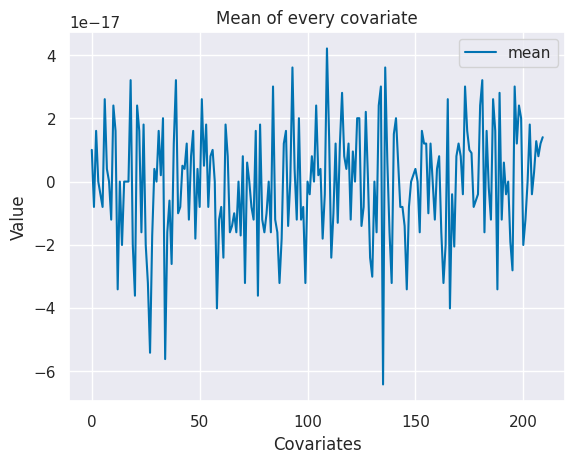

In [ ]:
#Plotting the mean and the standard deviation of every covariate
plt.figure()
plt.title("Standard deviation of every covariate")
plt.plot(std, label= 'std')
plt.grid()
plt.ylabel("Value")
plt.xlabel("Covariates")
plt.legend()
plt.show()

plt.figure()
plt.title("Mean of every covariate")
plt.plot(mean, label= 'mean')
plt.grid()
plt.ylabel("Value")
plt.xlabel("Covariates")
plt.legend()
plt.show()

As we can see from the graph of the standard deviation and the mean, we can conclude that our data is normalized and centered. In another words, the standard deviation is 1 for every covariate and the mean is very close to zero, in the order of $10^{-17}$. Thus, our data is indeed standardized.

In [ ]:
#Setting the random seed
seed = 0

#Separating the covariate data in train and test sets (1/4 of the data is for testing)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = seed)

In [ ]:
#Centering and standardizing the train and test data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Calculating the mean and standard deviation of the test and train data
mean_test = X_test.mean(axis = 0)
std_test = X_test.std(axis = 0)

mean_train = X_train.mean(axis = 0)
std_train = X_train.std(axis = 0)

#Scaling the Y variable
y_train = scale(y_train)
y_test = scale(y_test)

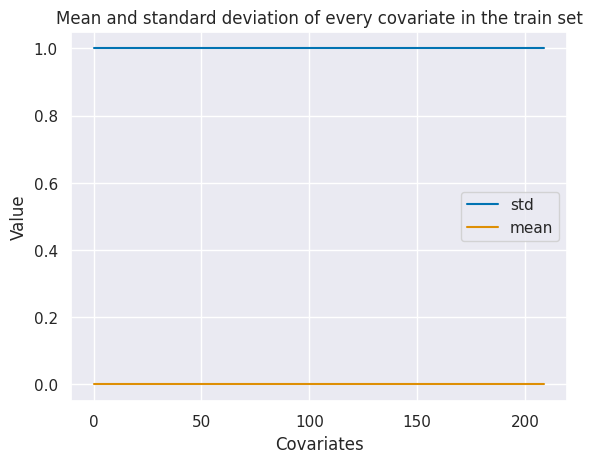

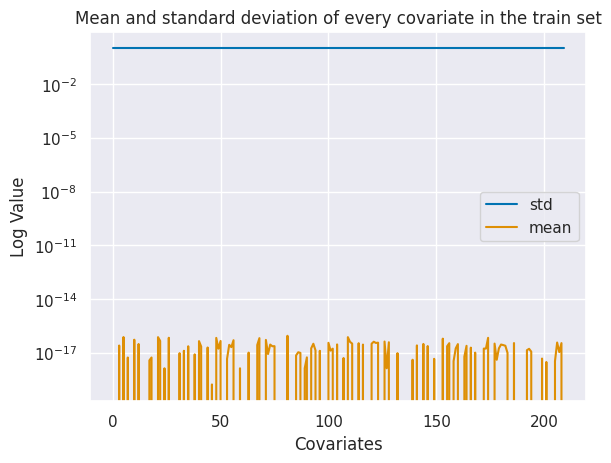

In [ ]:
#Plotting the standard deviation and the mean fot the train set
plt.figure()
plt.title("Mean and standard deviation of every covariate in the train set")
plt.plot(std_train, label = 'std')
plt.plot(mean_train, label = 'mean')
plt.grid()
plt.ylabel("Value")
plt.xlabel("Covariates")
plt.legend()
plt.show()

plt.figure()
plt.title("Mean and standard deviation of every covariate in the train set")
plt.plot(std_train, label = 'std')
plt.plot(mean_train, label = 'mean')
plt.grid()
plt.ylabel("Log Value")
plt.xlabel("Covariates")
plt.legend()
plt.yscale('log')
plt.show()

After centering and standardizing the data in the train set usingthe scaler *fit_transform()* ,we get the graphs above. Since the mean is zero and the standard deviation is 1 , the train set is indeed standardized and centered. 

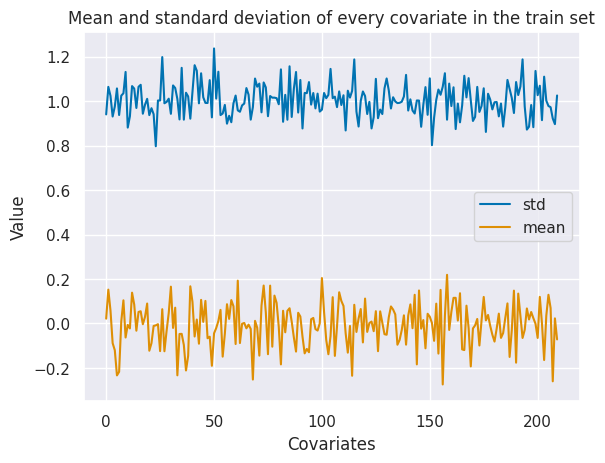

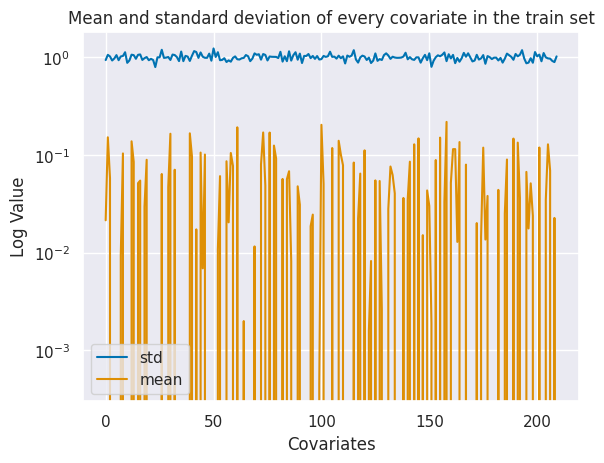

In [ ]:
#Plotting the standard deviation and the mean fot the test set
plt.figure()
plt.title("Mean and standard deviation of every covariate in the train set")
plt.plot(std_test, label = 'std')
plt.plot(mean_test, label = 'mean')
plt.grid()
plt.ylabel("Value")
plt.xlabel("Covariates")
plt.legend()
plt.show()

plt.figure()
plt.title("Mean and standard deviation of every covariate in the train set")
plt.plot(std_test, label = 'std')
plt.plot(mean_test, label = 'mean')
plt.grid()
plt.ylabel("Log Value")
plt.xlabel("Covariates")
plt.legend()
plt.yscale('log')
plt.show()

After centering and standardizing the data in the train set usingthe scaler *transform()* ,we get the graphs above. We can notice that the mean oscillates near 0 and the standard deviation oscillates near 1. So, we can approximate the test set as centered and standardized. If we used the other scaler, the same one we used in the train set, the result would be more ideal. 

In [ ]:
#Creating two empty dataFrames
df_test = pd.DataFrame()
df_coef = pd.DataFrame()
results = pd.DataFrame()

#Exercice 2

The determination coefficient is given by:

\begin{equation}
R^2 = \frac{\sum_{i=1}^{n} (\hat{y}_i - \bar{y}^n)^2} {\sum{i=1}^{n} (y_i - \bar{y}^n)²} = 1 - \frac{\parallel \hat{Y} - Y \parallel ^2}{\parallel Y - \bar{Y} \textbf{1}_n \parallel ^2}
\end{equation}

The mean squared error is given by:

\begin{equation}
MSE = \frac{1}{n} (\sum_{i=1}^{n} Y_i - \hat{Y}_i)^2
\end{equation}
 
 where $\hat{Y}$ is the predicted value.

In [ ]:
#Determination coefficient
def R2(Y,Y_pred):
  res = 1 - sum((Y - Y_pred)**2)/sum((Y - np.mean(Y)*np.ones(len(Y)))**2)
  return(res)

#Mean squared error
def MSE(Y,Y_pred):
  res = sum((Y - Y_pred)**2)/len(Y_pred)
  return(res)

#Exercice 3

In [ ]:
#Applying the linear regression of the sklearn library to the train data
model = LinearRegression()            
model = model.fit(X_train, y_train)   

y_pred = model.predict(X_test)

#Calculating the determination coefficient and the MSE of the test data
print("Calculating the R^2 and MSE using the function created in this document")
print("R^2: ", R2(y_test,y_pred))
print("MSE: ", MSE(y_test,y_pred))

#Calculating the determination coefficient and the MSE of the test data using sklearn
print("\nCalculating the R^2 and MSE using the sklearn function")
print("R^2: ",r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

#Adding column OLS to df_test and df_coef 
df_test['OLS'] = y_pred
df_coef['OLS'] = model.coef_

Calculating the R^2 and MSE using the function created in this document
R^2:  0.1441296037607378
MSE:  0.8558703962392628

Calculating the R^2 and MSE using the sklearn function
R^2:  0.1441296037607377
MSE:  0.8558703962392626


Using the function defined in this notebook, we get the sema results of the sklearn function. Regarding the results, we can say that the predicted value are not close to the real values, because the determination coefficient is very close to zero. In the ideal case $Y = \hat{Y}$, this it implies that $R^2 = 1$ and $MSE = 0$. Thus, our model do not represent well our data.

# **PCA - Principal Component Analysis**

#Exercice 4

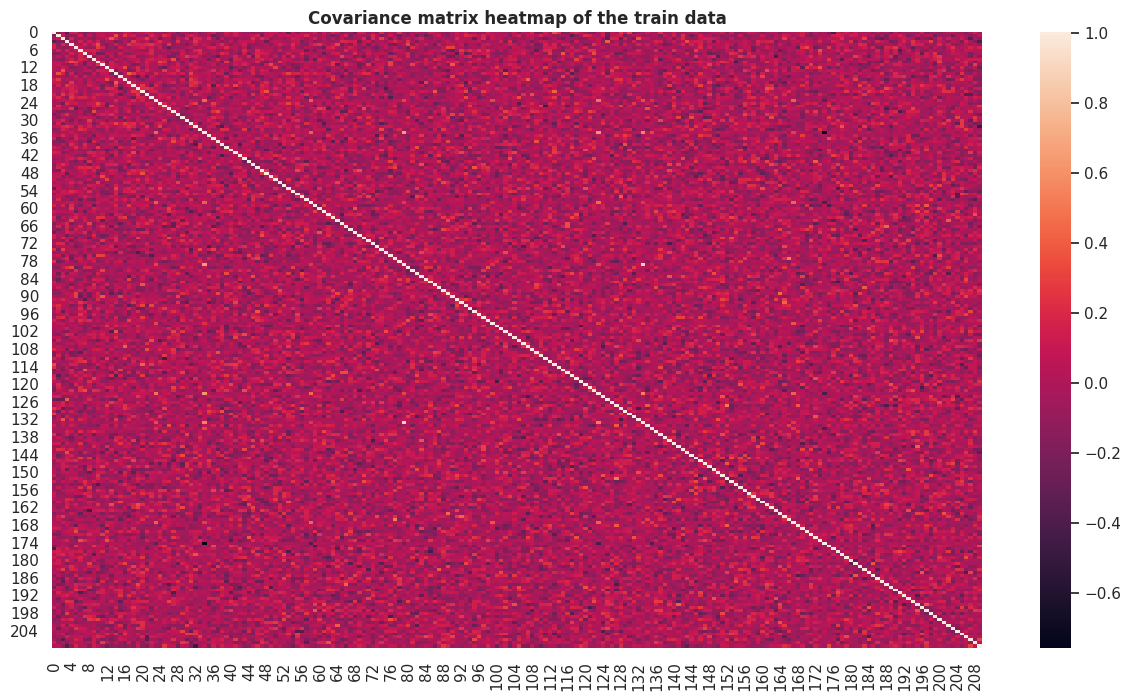

In [ ]:
#Plotting the covariance matrix
cov_matrix = np.cov(X_train.T)
plt.figure(figsize=(15,8))
sns.heatmap(cov_matrix)
plt.title("Covariance matrix heatmap of the train data", fontweight="bold")
plt.show()

As we can see by analyzing the heatmap of the covariance matrix, the diagonal is equal to one. This come from the fact that the $Cov(X_i,X_i) = Var(X_i)$. Since the data is normalized, we have that $Var(X_i) = 1$, which explains why the diagonal of the covariance matrix is equal to one. Moreover, for the elements outside of the diagonal, we can notice that its values are close to zero. This result comes from the fact that the variables in our data are almost uncorrelated, $Cov(X_i,X_j) ≈ 0$, for $i ≠ j$. Thus, we can say that we are satisfying the assumption of homoskedasticity, in which the covariance of our data is an identity matrix multiplied by the variance. In the homoskedastic case, the variance is the same for all variables in ou data. Since the data is centered, we have:

\begin{equation}
  Cov(X) = E[XX^T] = \sigma^2 I 
\end{equation}

In [ ]:
#Computing the singular value decomposition of the covariance matrix
U, s, V = np.linalg.svd(cov_matrix)

#Exercice 5

Applying the singular value decomposition in the matrix X, we get:

\begin{equation}
  X = VSU^T
\end{equation}
in which $U\in \mathbb{R}^{p x p}$, $V\in \mathbb{R}^{n x n}$ and $U\in \mathbb{R}^{n x p}$. The matrix S is given by the diagonal formed by $(\sigma_1,...,\sigma_{min(n,p)})$ and zero elsewhere.

Without loss of generality, we assume that $p \leq n$ for this deduction. We can also write that:

\begin{equation}
  X^TX = (VSU^T)^T VSU^T = US^TV^TVSU^T
\end{equation}

Since V is orthonormal, $V^TV = VV^T = I $,

\begin{equation}
  X^TX = US^TSU^T
\end{equation}

In this case $S^2 = S^TS \in \mathbb{R}^{p x p}$ and is given by $diag(\sigma_1^2,...,\sigma_p^2)$. So, we can calculate:

\begin{equation}
  X^TXU = US^TSU^TU = US^2
\end{equation}

Multiplying both sides by $(n-1)^{-1}$,

\begin{equation}
  (n-1)^{-1}X^TXU = (n-1)^{-1}US^2
\end{equation}

We know that the Gram matrix $G$ is a covariance matrix given by $G = (n-1)^{-1}X^TX$,

\begin{equation}
  GU = US^2(n-1)^{-1}
\end{equation}

We can write this as 

\begin{equation}
  G[u_1 ... u_p] = [\sigma_1^2u_1 ... \sigma_n^2u_n](n-1)^{-1}
\end{equation}
in which $u_i$ are the column vectors of the matrix $U$. So, we get:

\begin{equation}
  Gu_i = \sigma_i^2(n-1)^{-1}u_i =  \lambda_i u_i \;\; \forall i \in {1,...,p}
\end{equation}

By the last equation, we can conclude that the relation between the eigenvalues of the Gram matrix and the singular values of X is given by:


\begin{equation}
\lambda_i = \sigma_i^2(n-1)^{-1}\;\; \forall i \in {1,...,p}
\end{equation}




##Exercice 6

The variance explained $v_i$ by each principal component is given by:

\begin{equation}
v_i = \frac{\sigma_i}{\sum_{i = 1}^n \sigma_i} 
\end{equation}

In [ ]:
#Computing the principal components matrix
pc = np.dot(X_train,U)

#Taking the PC1 and PC2, the greatest influence on the variance 
PC1 =  pc[:,0]
PC2 = pc[:,1]

#Calculating the variance explained by each principal component
var_PC1 = s[0]/sum(s)
var_PC2 = s[1]/sum(s)

print("Variance explained by PC1: " + str(var_PC1*100) + "%")
print("Variance explained by PC2: " + str(var_PC2*100) + "%")

Variance explained by PC1: 2.8318727879447065%
Variance explained by PC2: 2.5923367797720975%


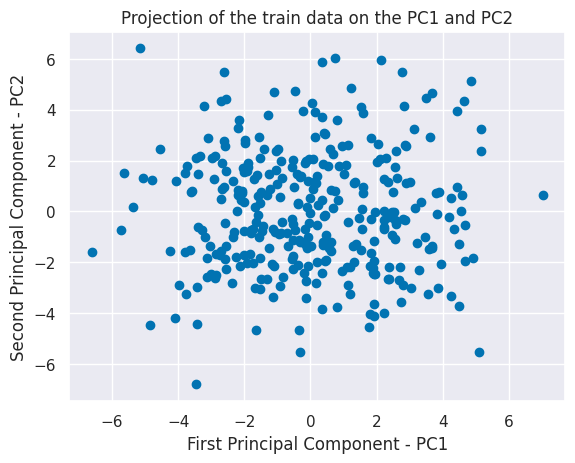

In [ ]:
#Plotting the scattering of the PC1 and PC2
plt.figure()
plt.scatter(PC1, PC2)
plt.grid()
plt.ylabel("Second Principal Component - PC2")
plt.xlabel("First Principal Component - PC1")
plt.title("Projection of the train data on the PC1 and PC2")
plt.show()

##Exercice 7

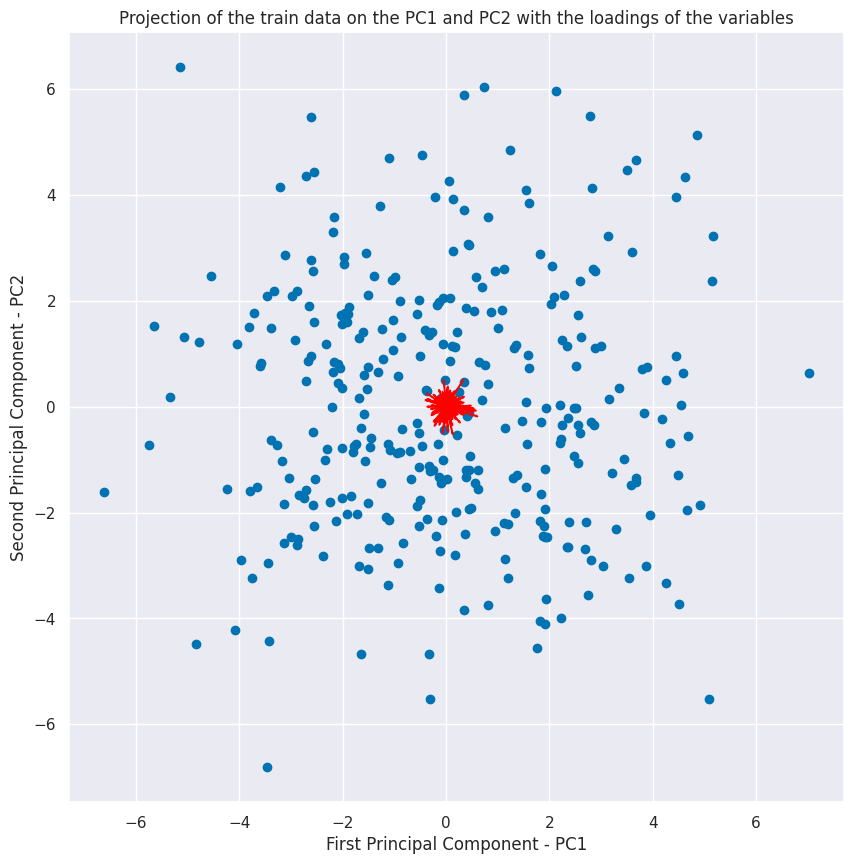

In [ ]:
#Calculating the loadings of each principal component
loading_PC1 = U[:, 0]*np.sqrt(s[0])
loading_PC2 = U[:, 1]*np.sqrt(s[1])

#Plotting the arrows representing the loadings
plt.figure(figsize = [10,10])
plt.scatter(PC1, PC2)
for i in range(len(U)):
  plt.arrow(0, 0, loading_PC1[i], loading_PC2[i], width = 0.01, color='red')
plt.grid()
plt.ylabel("Second Principal Component - PC2")
plt.xlabel("First Principal Component - PC1")
plt.title("Projection of the train data on the PC1 and PC2 with the loadings of the variables")
plt.show()

In this graph, we can see the loadings (red arrows), they can be calculated multplying the singular vectos by the square root of the singular values, which are the variances. Therefore, the loadings are the normalized coordinates of the principal components vectors. They represent how much each variable of our dataset contributes to a particular principal component. Since we are dealing with a covariance matrix, in other words we applied the singular value decomposition on the covariance matrix, the singular values are  the variance explained by which principal component. In general, the loadings can be interpreted as the weights for each variable in our dataset that are represented in our new space defined by the principal components.

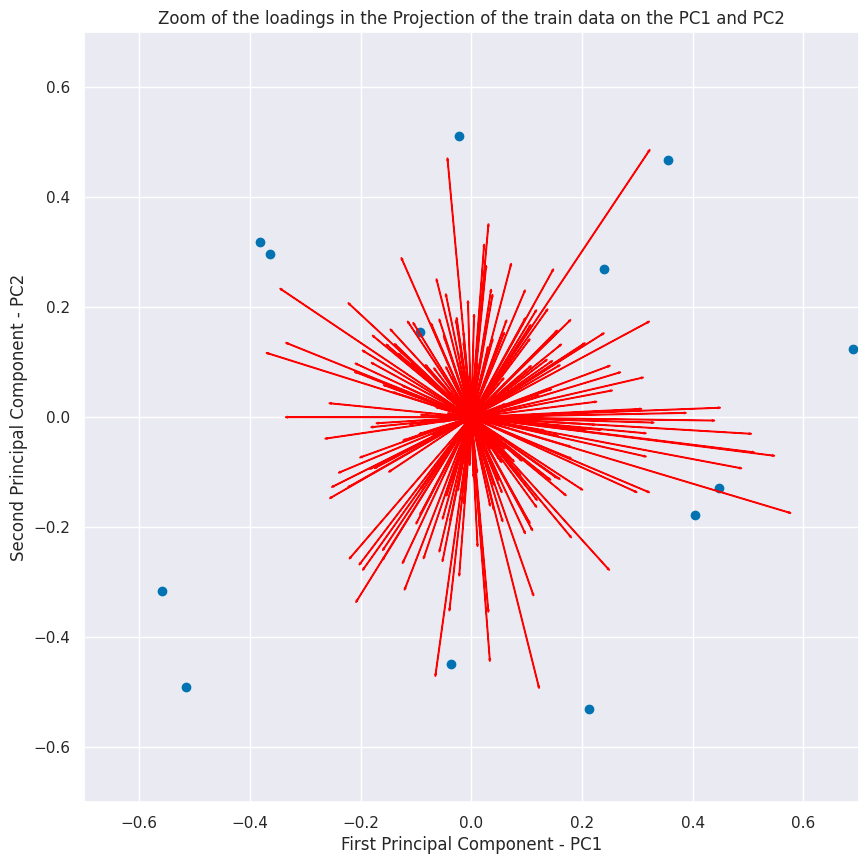

In [ ]:
#Making a zoom in the arrows representing the loadings 
plt.figure(figsize = [10,10])
plt.scatter(PC1, PC2)
for i in range(len(U)):
  plt.arrow(0, 0, loading_PC1[i], loading_PC2[i], width = 0.001, color='red')
plt.grid()
plt.axis([-0.7, 0.7, -0.7, 0.7])
plt.ylabel("Second Principal Component - PC2")
plt.xlabel("First Principal Component - PC1")
plt.title("Zoom of the loadings in the Projection of the train data on the PC1 and PC2")
plt.show()

##Exercice 8

In [ ]:
#Applying the PCA before the OLS
X_train_PCA = np.dot(X_train, U[:, 0:60]) 
X_test_PCA = np.dot(X_test, U[:, 0:60])

#Applying the linear regression of the sklearn library to the train data
model_PCA = LinearRegression()            
model_PCA = model_PCA.fit(X_train_PCA, y_train)   

y_pred = model_PCA.predict(X_test_PCA)

#Calculating the determination coefficient and the MSE of the test data
print("Calculating the R^2 and MSE using the function created in this document")
print("R^2: ", R2(y_test,y_pred))
print("MSE: ", MSE(y_test,y_pred))

#Adding column pca_ols to df_test 
df_test['pca_ols'] = y_pred

Calculating the R^2 and MSE using the function created in this document
R^2:  0.33492714690452585
MSE:  0.6650728530954745


Thus, we can conclude that the model genereted by the OLS  after using the principal component analysis with 60 principal components is better then before, because the MSE decreases and the R increases. Nevertheless, the predicted values are still not ideal.

#**Regularization**

##Exercice 9

The Lasso estimator is given by the following optimization problem:

\begin{equation}
\hat{\theta}_n \in argmin(\frac{1}{2} \parallel y-X\theta \parallel^2_2 + \alpha \parallel \theta \parallel _1 ) 
\end{equation}

In [ ]:
#Applying the LassoCV of the sklearn library
a = np.logspace(-3, 1, 30)
model = LassoCV(cv = 5, n_alphas = 30, alphas = a, random_state=0)     
model = model.fit(X_train, y_train)   

y_pred = model.predict(X_test)

#Calculating the determination coefficient and the MSE of the test data
print("Calculating the R^2 and MSE for the LASSO")
print("R^2: ", R2(y_test,y_pred))
print("MSE: ", MSE(y_test,y_pred))

#Printing the regularization parameter of the LASSSO model
alpha_lasso = model.alpha_
print("Regularization parameter of the LASSSO model: ", alpha_lasso)

# Adding column Lasso to coefficients and test dataframes
df_test["Lasso"] = y_pred
df_coef["Lasso"] = model.coef_

Calculating the R^2 and MSE for the LASSO
R^2:  0.3422027348637151
MSE:  0.6577972651362853
Regularization parameter of the LASSSO model:  0.06210169418915616


We can conclude that this model is better than the first one, because we get a higher value of $R^2$ and a lower value of $MSE$. We can also see that the value of the regularization parameter is small, but is different from zero. When the regularization parameter tends to zero the Lasso estimator tends to the OLS estimator.

##Exercice 10

The Ridge estimator is given by the following optimization problem:

\begin{equation}
\hat{\theta}_n \in argmin( \parallel y-X\theta \parallel^2_2 + \alpha \parallel \theta \parallel ^2 ) 
\end{equation}

In [ ]:
#Applying the RidgeCV of the sklearn library
a = np.logspace(-1, 2, 30)
model = RidgeCV(alphas = a)     
model = model.fit(X_train, y_train)   

y_pred = model.predict(X_test)

#Calculating the determination coefficient and the MSE of the test data
print("Calculating the R^2 and MSE for the Ridge")
print("R^2: ", R2(y_test,y_pred))
print("MSE: ", MSE(y_test,y_pred))

#Printing the regularization parameter of the Ridge model
alpha_ridge = model.alpha_
print("Regularization parameter of the Ridge model: ", alpha_ridge)

# Adding column Ridge to coefficients and test dataframes
df_test["Ridge"] = y_pred
df_coef["Ridge"] = model.coef_

Calculating the R^2 and MSE for the Ridge
R^2:  0.3330750067402757
MSE:  0.6669249932597248
Regularization parameter of the Ridge model:  48.93900918477494


The model is better then the OLS in the first exercice. Also, the regularization parameter is not as close to zero as the regularization we got for the Lasso model. Here is also valid that, when the regularization parameter tends to zero the Ridge estimator tends to the OLS estimator

#**Variable selection**

##Exercice 11

In [ ]:
#Getting the values of the OLS estimator theta
def theta(X, r):
    model = LinearRegression()
    model = model.fit(X.reshape(-1, 1), r)
    return model.coef_

#Calculating the s function for the T-value
def s(X):
    return (X.T@X/len(X))**(-1/2)

#Calculating the squareroot of sigma - noise leval estimate
def sigma(X, r):
    return np.linalg.norm(r - theta(X, r)*X)/(len(X)-2)**(1/2)

#Calculating the test statistics
def Tn(X, r):
    return (np.abs(theta(X, r))/(s(X)*sigma(X, r)))[0]*len(X)**(1/2)

#Calculating the test statistics for all X_k in the set A
def Tn_list(A, X, r):
    Tn_list = np.zeros(X.shape[1])
    for i in A:
        Tn_list[i] = Tn(X[:, i], r)
    return Tn_list

In [ ]:
def forward_variable_selection(X, y, pstop = None):
  #Starting the foward variable selection algorithm:
  # 1. Defining the residue
  r = y
  # 2. The set containing the index of all the variables
  A = [k for k in range(X.shape[1])]
  # 3. The set containing the selected variables, it starts empty
  S = []  
  T = []
  p = []
  #p-values list
  pValue= list(range(X.shape[1]))

  while len(S) != len(A):
    #(i) For each k in A\S, compute Tn:
    Test = Tn_list(A, X, r)

    #argmax Tn
    i = np.where(Test == np.max(Test))[0][0]

    #Calculating the p-value
    pValue[i] = 2*(1-stats.norm.cdf(Test[i]))

    #Threshold
    if pstop:
            if pValue[i] > pstop:
                break
  
    #i* in argmax T(Y, Xk_tilde) 
    S.append(i)
    A.remove(i)
    T.append(Test)

    # Updates r
    r = r - theta(X_train[:, i] , r)*X_train[:, i]
  
  return S, pValue, T

In [ ]:
S, pValue, Test = forward_variable_selection(X_train, y_train)
print("Result of the variable selection: ", S)

Result of the variable selection:  [58, 123, 208, 133, 129, 13, 77, 92, 34, 152, 31, 131, 59, 196, 135, 102, 167, 56, 60, 63, 110, 130, 99, 138, 97, 53, 169, 69, 36, 79, 21, 174, 122, 51, 61, 159, 49, 74, 75, 12, 202, 95, 112, 163, 191, 204, 81, 23, 193, 147, 183, 55, 24, 108, 8, 14, 103, 19, 115, 197, 118, 71, 88, 155, 139, 83, 141, 30, 182, 168, 2, 154, 6, 149, 104, 181, 18, 199, 101, 57, 165, 93, 134, 50, 64, 65, 188, 78, 180, 136, 85, 146, 25, 87, 28, 15, 172, 171, 156, 37, 22, 201, 119, 9, 73]


##Exercice 12

In [ ]:
S1, pValue1, T1 = forward_variable_selection(X_train, y_train, 0.05)

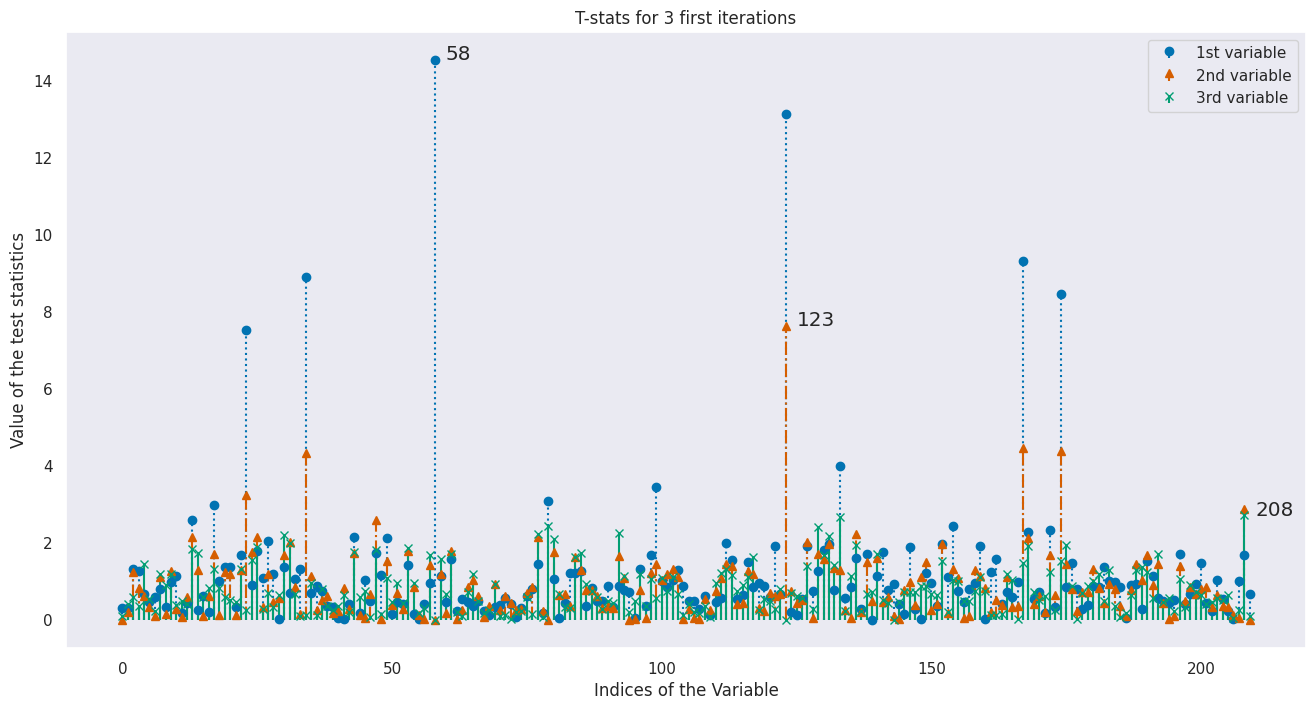

In [ ]:
#Plotting the test statistics fpr the first 3 iterations
plt.figure(figsize=(16,8))

plt.stem(T1[0], linefmt='b:', markerfmt='bo', basefmt=' ', label='1st variable', use_line_collection=True)
plt.stem(T1[1], linefmt='r-.', markerfmt='r^', basefmt=' ', label='2nd variable', use_line_collection=True)
plt.stem(T1[2], linefmt='g-', markerfmt='gx', basefmt=' ', label='3rd variable', use_line_collection=True)
for i in range(3):
  plt.annotate(s=str(np.argmax(T1[i])), xy=(np.argmax(T1[i])+2, max(T1[i])), fontsize='large')

plt.xlabel('Indices of the Variable')
plt.ylabel('Value of the test statistics')
plt.title('T-stats for 3 first iterations')
plt.legend()
plt.show()

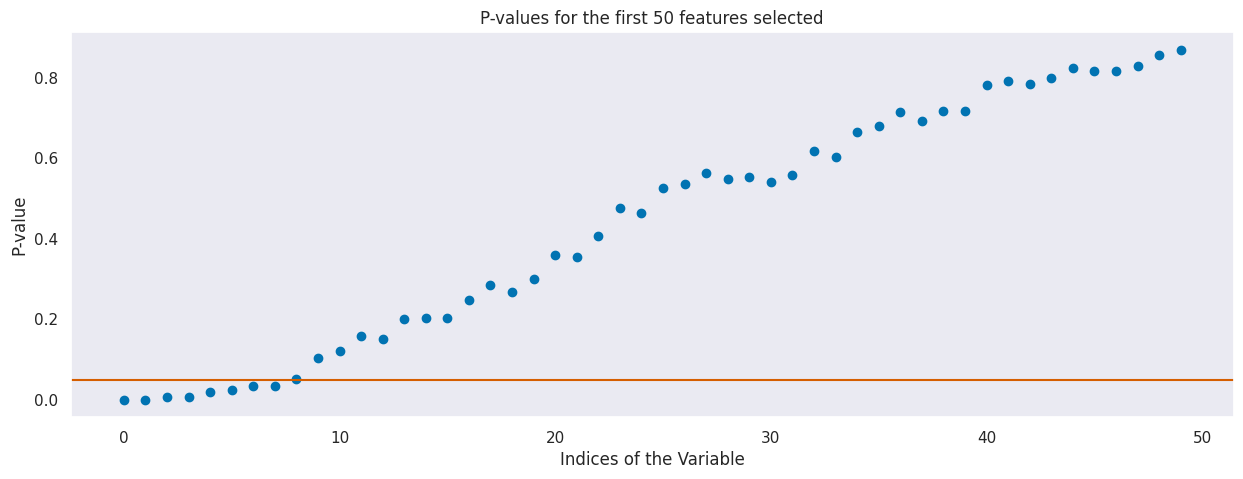

In [ ]:
plt.figure(figsize=(15,5))
plt.title('P-values for the first 50 features selected')
plt.xlabel('Indices of the Variable')
plt.ylabel('P-value')
plt.axhline(y=0.05, color='r', linestyle='-', label='p-value = 0.05')
plt.scatter(range(50), pd.DataFrame(pValue).loc[S[:50]])
plt.show()

This graph shows us that the variables above the read line of 0.05 will not be used. So we get as a result of variable selectio with 0.05 as stop criteria.

In [ ]:
print("Result of the variable selection with stop criteria: ", S1)

Result of the variable selection with stop criteria:  [58, 123, 208, 133, 129, 13, 77, 92]


##Exercice 13





In [ ]:
#Selecting variables
X_train_fvs = X_train[:, S1]
X_test_fvs = X_test[:, S1]

#Applying the linear regression of the sklearn library to the train data
model = LinearRegression()            
model = model.fit(X_train_fvs, y_train)   

y_pred = model.predict(X_test_fvs)

#Calculating the determination coefficient and the MSE of the test data
print("Calculating the R^2 and MSE using the function created in this document")
print("R^2: ", R2(y_test,y_pred))
print("MSE: ", MSE(y_test,y_pred))

#Adding column FVS to df_test and df_coef
df_test['FVS'] = y_pred
coef = np.zeros(X_train.shape[1])
coef[S1] = model.coef_
df_coef['FVS'] = coef

Calculating the R^2 and MSE using the function created in this document
R^2:  0.2579822502050445
MSE:  0.742017749794956


We obtained a better result than the OLS done in the first exercise

#**Comparison**

##Exercice 14

Summary of the results of all methods:

* **OLS**:

  * Determination coefficient: 0.1441296037607378
  * MSE: 0.8558703962392626

* **PCA before OLS**:

  * Determination coefficient:   0.33492714690452585
  * MSE:  0.6650728530954745

* **Lasso**:

  * Determination coefficient:  0.3422027348637151
  * MSE:  0.6577972651362853

* **Ridge**:

  * Determination coefficient:  0.3330750067402757
  * MSE:  0.6669249932597248

* **OLS after forward variable selection**:

  * Determination coefficient:  0.2579822502050445
  * MSE:  0.742017749794956



By analyzing the results, we can conclude  that the PCA before OLS, Lasso and Ridge have the similar results and they are the best ones. The worst result is the OLS. We can also notice that if we do a variable selection the results of the OLS get better. This metrics comes from the fact that in the ideal case  $Y = \hat{Y}$, this it implies that  $𝑅^2=1$  and  $𝑀𝑆𝐸=0$ . We can see the same result in the graph bellow:

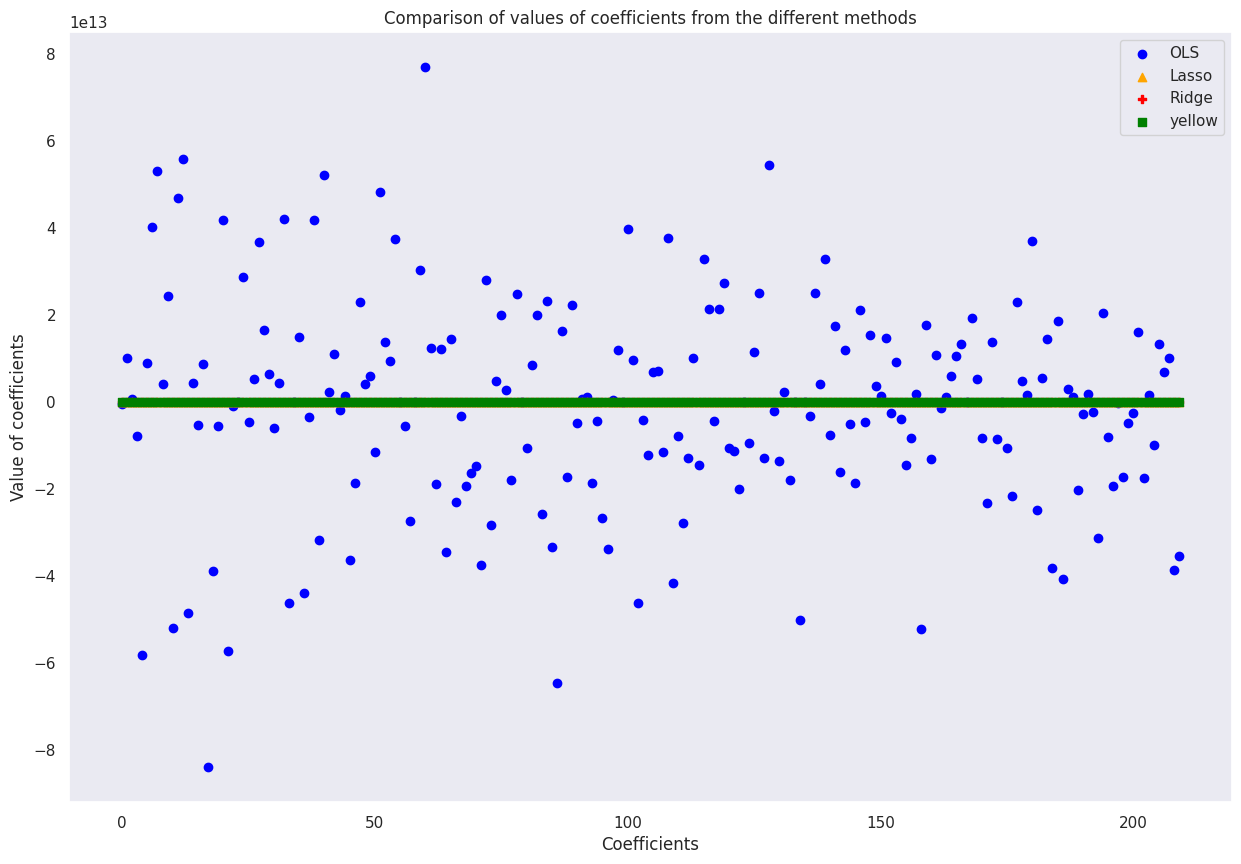

In [ ]:
plt.subplots(figsize=(15, 10))
plt.scatter(range(X.shape[1]), df_coef.loc[:, 'OLS'], color='blue',label = 'OLS', marker='o')
plt.scatter(range(X.shape[1]), df_coef.loc[:, 'Lasso'], color='orange',label = 'Lasso', marker='^')
plt.scatter(range(X.shape[1]), df_coef.loc[:, 'Ridge'], color='red', label = 'Ridge', marker='P')
plt.scatter(range(X.shape[1]), df_coef.loc[:, 'FVS'], color='green', label = 'yellow', marker='s')
plt.title('Comparison of values of coefficients from the different methods')
plt.ylabel('Value of coefficients')
plt.xlabel('Coefficients')
plt.legend()
plt.show()

##Exercice 15

In [ ]:
print(f" OLS: ", np.count_nonzero(df_coef.loc[:, 'OLS'] == 0), "coefficients that set to zero")
print(f" Lasso: ", np.count_nonzero(df_coef.loc[:, 'Lasso'] == 0), "coefficients that set to zero")
print(f" Ridge: ", np.count_nonzero(df_coef.loc[:, 'Ridge'] == 0), "coefficients that set to zero")
print(f" FVS: ", np.count_nonzero(df_coef.loc[:, 'FVS'] == 0), "coefficients set that to zero")

 OLS:  0 coefficients that set to zero
 Lasso:  193 coefficients that set to zero
 Ridge:  0 coefficients that set to zero
 FVS:  202 coefficients set that to zero


Seeing this result we can notice that only FVS and Lasso have coefficients that set to zero. This was expected, since FVS selects variables that respect the stopping criterion. Moreover, for the case of the Lasso, this was also expected, because Lasso gives us a sparse solution. This happens because the Lasso tries to select the most relevant features, simplyfing the model. That is the difference from the Ridge model that uses a $l_2$ penalty function.

##Exercice 16

To calculate the predicted value $\hat{Y}$ for each model, we have:

**OLS:** 
 * $\hat{Y} = X \widehat{\theta}^{ols}$

**PCA before OLS:** 
 * $\hat{Y} = XU \widehat{\theta}^{pca}$

 $U$ comes from the SVD, it is the matrix with the singular vectors

**Lasso:** 
 * $\hat{Y} = X \widehat{\theta}^{lasso}$

**Ridge:** 
 * $\hat{Y} = X \widehat{\theta}^{rigde}$

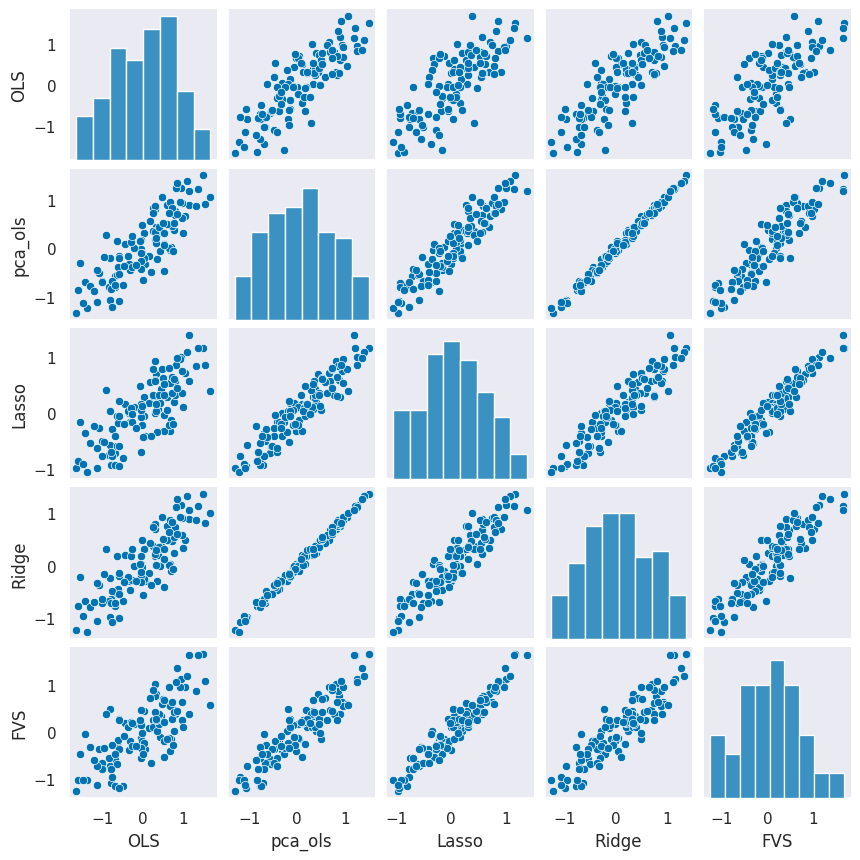

In [ ]:
# Plotting pairplot graph for all methods
sns.pairplot(df_test, height=1.75)
plt.grid()
plt.show()

##Exercice 17

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection, datasets

In [ ]:
#Getting the data 
X, y= datasets.load_diabetes(return_X_y=True)
X = X[:,2].reshape(-1,1)
scaler = StandardScaler()
X_df = pd.DataFrame(scaler.fit_transform(X))
Y_df = pd.DataFrame(y)

#Applying OLS
model = LinearRegression()            
model = model.fit(X_df, y)  
theta = model.coef_
print("theta_1: ", theta) 

theta_1:  [45.16003002]


In [ ]:
def CI(a, Y, X, theta):
  a = 0.05
  quantile = stats.norm.ppf(1 - a/2)
  sigma2 = ((np.linalg.norm((Y - X*theta),2))**2)/(len(X)-2)
  sqr=np.sqrt(sigma2*np.linalg.inv(np.dot(X.transpose(),X)))
  low = theta - quantile*sqr
  up = theta + quantile*sqr
  return low, up

In [ ]:
#Calculating the confidence interval
print(f"CI = {CI(0.05, Y_df, X_df, theta)}")

CI = (array([[29.79669963]]), array([[60.52336041]]))
